In [194]:
import numpy as np
from matplotlib import pyplot as plt
import time

In [195]:
x = 2 * np.random.rand(100,1)
y = 4 +3 * x + np.random.randn(100,1)

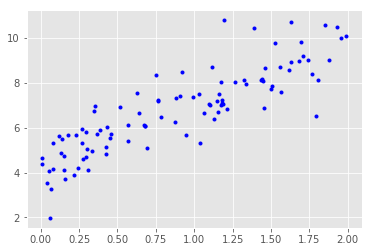

In [196]:
plt.plot(x,y,'b.')
plt.show()

In [197]:
# 1. solve by doing matrix calculating

In [198]:
# add the intercept and combine with the x
intercept = np.ones((100,1))
new_x = np.concatenate((intercept, x), axis=1)

formula: theta =  Inverse(transpose(X) * X ) * transpose(X) * Y

In [199]:
start = time.time()
theta_best = np.linalg.inv(new_x.T.dot(new_x)).dot(new_x.T).dot(y)
end = time.time()
print("{} seconds".format(end - start))
print(theta_best)

0.00045800209045410156 seconds
[[4.35046216]
 [2.75395049]]


In [200]:
# 2. solve with scikit-learn

In [201]:
from sklearn.linear_model import LinearRegression

In [202]:
import pandas as pd

In [203]:
lm = LinearRegression()

In [204]:
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [205]:
print(lm.coef_)

[[2.75395049]]


In [206]:
lm.intercept_

array([4.35046216])

In [207]:
# 3. solve by doing gradien descent

In [208]:
def cal_cost(theta, x, y):
    m = len(y) # how many observations
    predictions = x.dot(theta) # predicted result
    error = predictions - y
    cost = (1/(2*m)) * np.sum(np.square(error)) # loss function
    return cost

In [209]:
def gradient_descent(x, y, theta, learning_rate = 0.01, iterations = 200):  
    # set default learning rate and how many iterations
    # how many observations
    m = len(y)
    
    # store the result
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    
    for it in range(iterations):
        predictions = x.dot(theta) # predicted result
        error = predictions - y
        theta = theta - (1/m) * learning_rate * (x.T.dot(error))
        theta_history[it, :] = theta.T
        cost_history[it] = cal_cost(theta,x,y)
        
    return theta, cost_history, theta_history

In [210]:
lr =0.01
n_iter = 1000

theta_gd = np.random.randn(2,1)
new_x = np.concatenate((intercept, x), axis=1)

start = time.time()
theta_gd,cost_history,theta_history = gradient_descent(new_x,y,theta_gd,lr,n_iter)
end = time.time()
print("{} seconds".format(end - start))
print(theta_gd)

0.02154397964477539 seconds
[[4.08871406]
 [2.99776654]]


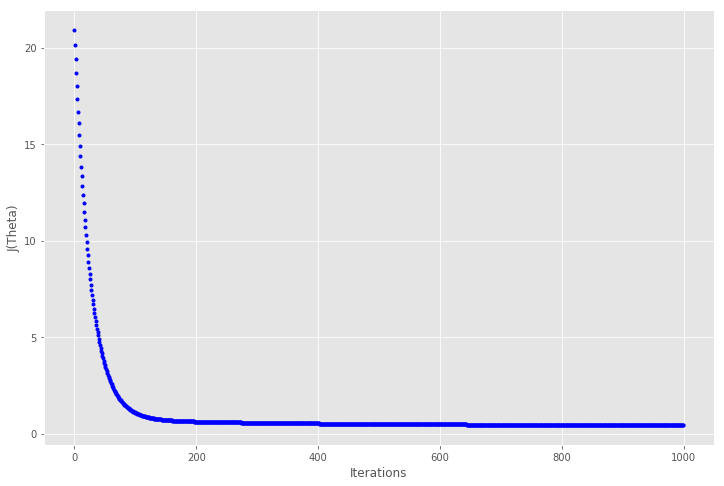

In [211]:
fig,ax = plt.subplots(figsize=(12,8))
plt.style.use(['ggplot'])
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(n_iter),cost_history,'b.')
plt.show()

In [212]:
# Stochastic Gradient Descent

In [225]:
def stocashtic_gradient_descent(x, y, theta, learning_rate=0.5, iterations=50):
    
    m = len(y)
    cost_history = np.zeros(iterations)    

    for it in range(iterations):
        cost =0.0
        
        # randomly choose a sample
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            new_x_i = new_x[rand_ind,:].reshape(1,new_x.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(new_x_i,theta)

            theta = theta -(1/m)*learning_rate*(new_x_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,new_x_i,y_i)
         
        cost_history[it]  = cost
        
    return theta, cost_history

In [226]:
lr = 0.5
n_iter = 50

theta = np.zeros([2,1])

start = time.time()
theta_sgd, cost_history_sgd = stocashtic_gradient_descent(new_x,y,theta,lr,n_iter)
end = time.time()
print("{} seconds".format(end - start))
print(theta_sgd)

0.14441204071044922 seconds
[[4.33571886]
 [2.77823639]]


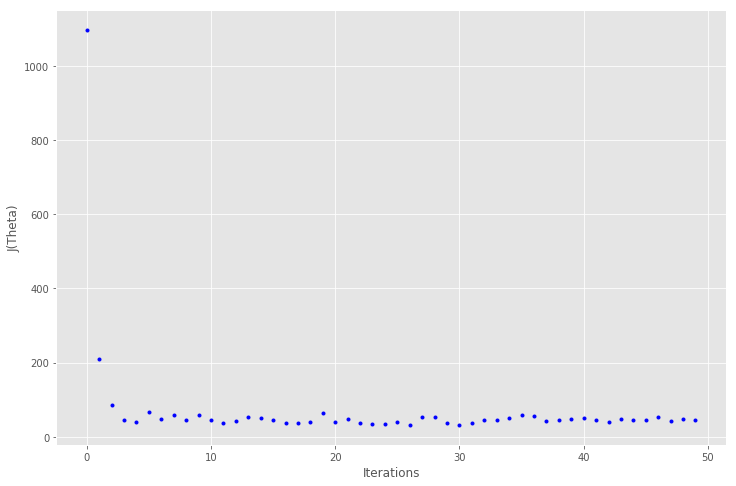

In [227]:
fig,ax = plt.subplots(figsize=(12,8))
plt.style.use(['ggplot'])
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(n_iter),cost_history_sgd,'b.')
plt.show()